In [1]:
import numpy as np
import cv2
import easyocr
import matplotlib.pyplot as plt
import urllib
import mediapipe

from utils import (
    url_to_image,
    print_result,
    cleanup_text,
    group_boxes_by_lines,
    put_results_on_image,
)


In [2]:
image = url_to_image('https://diafilmy.su/uploads/posts/2019-07/1564381098_pict-jimkpp-49.jpg')
reader = easyocr.Reader(['ru'], recog_network='cyrillic_g1') # this needs to run only once to load the model into memory
result = reader.readtext(image)

3 12


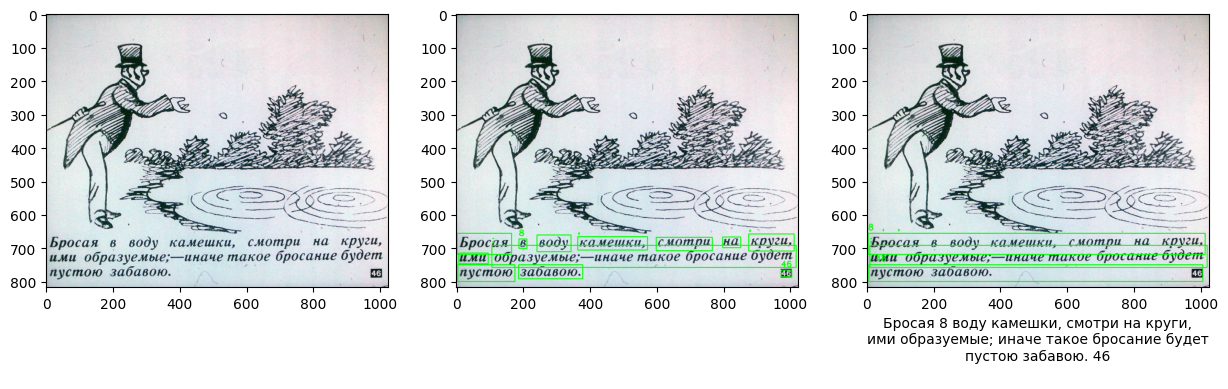

In [3]:
lines = group_boxes_by_lines(result)
print(len(lines), len(result))
image_basic = put_results_on_image(result, image)
image_res = put_results_on_image(lines, image)

fig, axes = plt.subplots(1,3, figsize=(15,5))                         
axes[0].imshow(image)
axes[1].imshow(image_basic)
axes[2].imshow(image_res)
axes[2].set_xlabel(''.join([i[-2]+'\n' for i in lines]))
plt.show()

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11x-cls.pt")
model.names

{0: 'tench',
 1: 'goldfish',
 2: 'great_white_shark',
 3: 'tiger_shark',
 4: 'hammerhead',
 5: 'electric_ray',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich',
 10: 'brambling',
 11: 'goldfinch',
 12: 'house_finch',
 13: 'junco',
 14: 'indigo_bunting',
 15: 'robin',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water_ouzel',
 21: 'kite',
 22: 'bald_eagle',
 23: 'vulture',
 24: 'great_grey_owl',
 25: 'European_fire_salamander',
 26: 'common_newt',
 27: 'eft',
 28: 'spotted_salamander',
 29: 'axolotl',
 30: 'bullfrog',
 31: 'tree_frog',
 32: 'tailed_frog',
 33: 'loggerhead',
 34: 'leatherback_turtle',
 35: 'mud_turtle',
 36: 'terrapin',
 37: 'box_turtle',
 38: 'banded_gecko',
 39: 'common_iguana',
 40: 'American_chameleon',
 41: 'whiptail',
 42: 'agama',
 43: 'frilled_lizard',
 44: 'alligator_lizard',
 45: 'Gila_monster',
 46: 'green_lizard',
 47: 'African_chameleon',
 48: 'Komodo_dragon',
 49: 'African_crocodile',
 50: 'American_alligator',
 51: 'triceratops',
 


0: 224x224 teddy 0.95, custard_apple 0.01, bull_mastiff 0.01, Border_terrier 0.00, potpie 0.00, 5.2ms
Speed: 3.9ms preprocess, 5.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Chihuahua 0.95, Pomeranian 0.02, toy_terrier 0.02, meerkat 0.00, Italian_greyhound 0.00, 5.5ms
Speed: 2.3ms preprocess, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 panpipe 0.63, potpie 0.08, eggnog 0.05, drum 0.04, brambling 0.03, 5.7ms
Speed: 2.3ms preprocess, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Chihuahua 0.96, Pomeranian 0.03, toy_terrier 0.00, meerkat 0.00, langur 0.00, 5.6ms
Speed: 2.2ms preprocess, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 Chihuahua 0.60, toy_terrier 0.34, miniature_pinscher 0.02, Mexican_hairless 0.02, Italian_greyhound 0.01, 6.3ms
Speed: 2.0ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 2

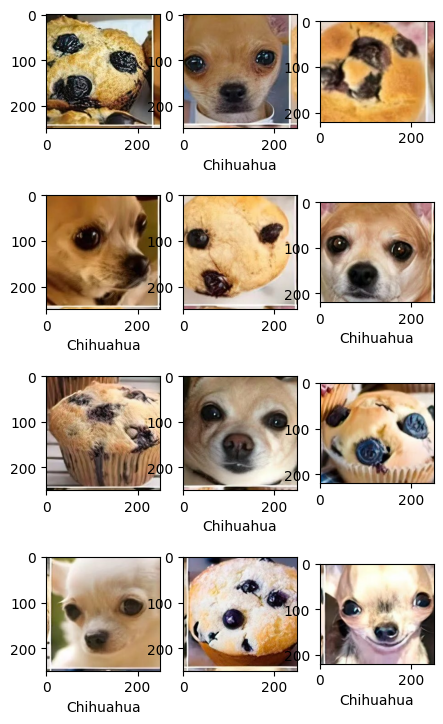

In [5]:
# Perform object detection on an image
image = url_to_image('https://avatars.mds.yandex.net/i?id=b8ba025927360cc68b04308896d1401f_l-5022652-images-thumbs&n=13')[:,140:1150]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

fig, axes = plt.subplots(4,3, figsize=(5,9)) 
for i in range(3):
    for j in range(4):
        img = image[i*250:(i+1)*250,j*250:(j+1)*250,:]
        results = model(img)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        axes[j,i].imshow(img)
        if model.names[results[0].probs.top1] == 'Chihuahua':
            axes[j,i].set_xlabel(model.names[results[0].probs.top1])

In [8]:

drawingModule = mediapipe.solutions.drawing_utils
handsModule = mediapipe.solutions.hands
 
capture = cv2.VideoCapture(0)
 
with handsModule.Hands(static_image_mode=False, min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2) as hands:
 
    while (True):
 
        ret, frame = capture.read()
        results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
 
        if results.multi_hand_landmarks != None:
            for handLandmarks in results.multi_hand_landmarks:
                drawingModule.draw_landmarks(frame, handLandmarks, handsModule.HAND_CONNECTIONS)
 
        cv2.imshow('Test hand', frame)
 
        if cv2.waitKey(1) == 27:
            break
 
cv2.destroyAllWindows()
capture.release()

I0000 00:00:1742000408.958779   11199 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1742000408.990921   11381 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.230.02), renderer: NVIDIA GeForce RTX 2060 SUPER/PCIe/SSE2
W0000 00:00:1742000409.032815   11372 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742000409.048594   11375 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
